In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2c2e3ea3-9d13-d562-83ed-9896db613b6e)


In [5]:
# !pip install torch torchvision torchaudio diffusers transfromers accelerate

  Using cached diffusers-0.30.0-py3-none-any.whl.metadata (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.8 MB/s eta 0:00:00


In [3]:
# !pip install accelerate

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
import torch
import diffusers
import transformers

In [9]:
# transformers.__version__

'4.42.4'

In [10]:
# !pip install opencv-python

In [3]:
from diffusers import StableVideoDiffusionPipeline

In [4]:
video_pipe = StableVideoDiffusionPipeline.from_pretrained("stabilityai/stable-video-diffusion-img2vid-xt",
                                                          torch_dtype=torch.float16,
                                                          variant = 'fp16')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/3.05G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
video_pipe.enable_model_cpu_offload()

In [6]:
from diffusers.utils import load_image, export_to_video

In [7]:
image = load_image('nasa.jpg')

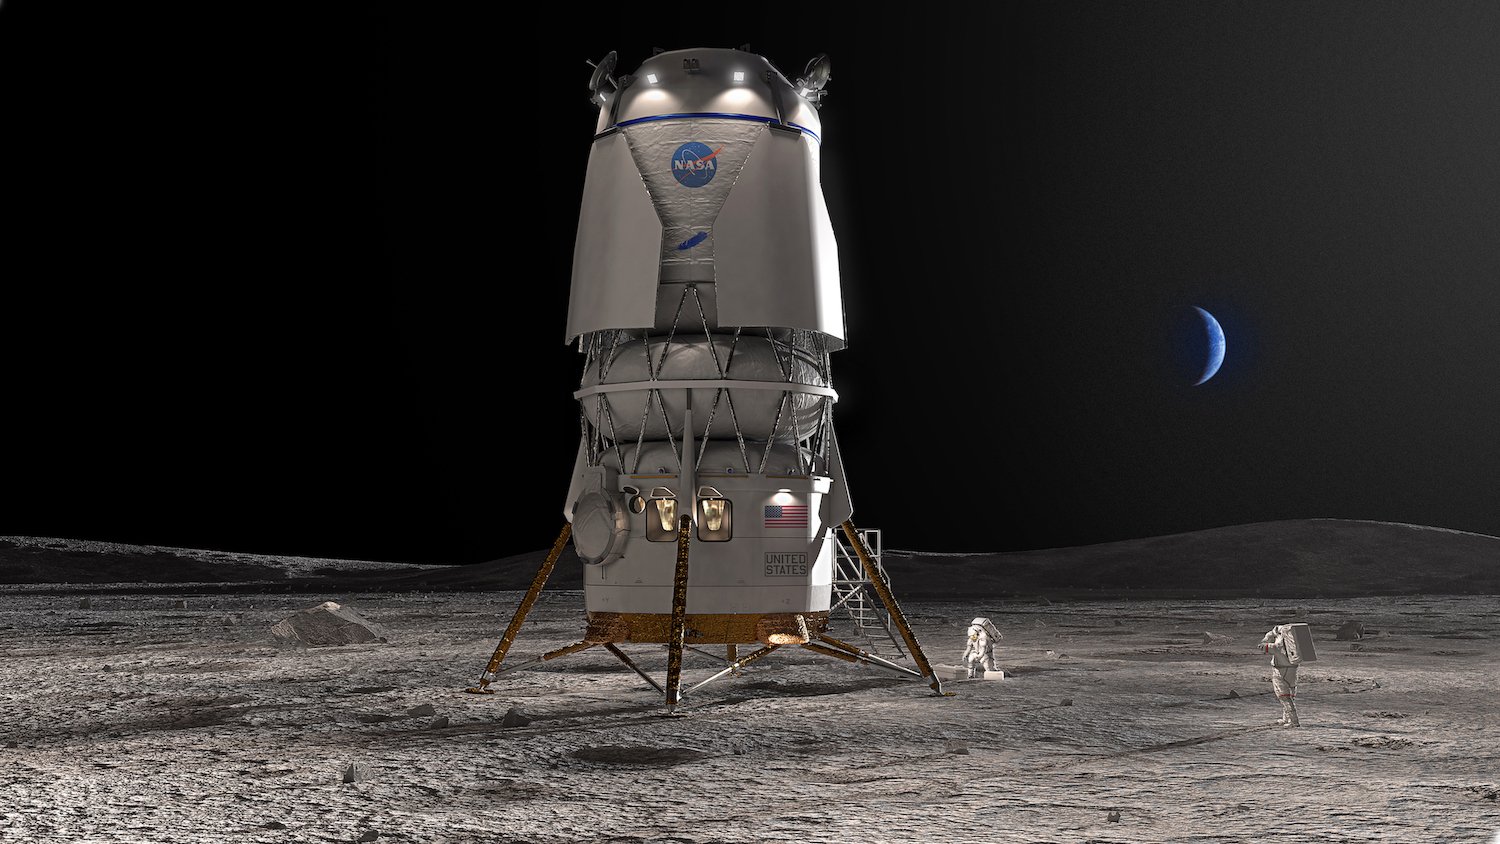

In [8]:
image

In [9]:
image.size

(1500, 844)

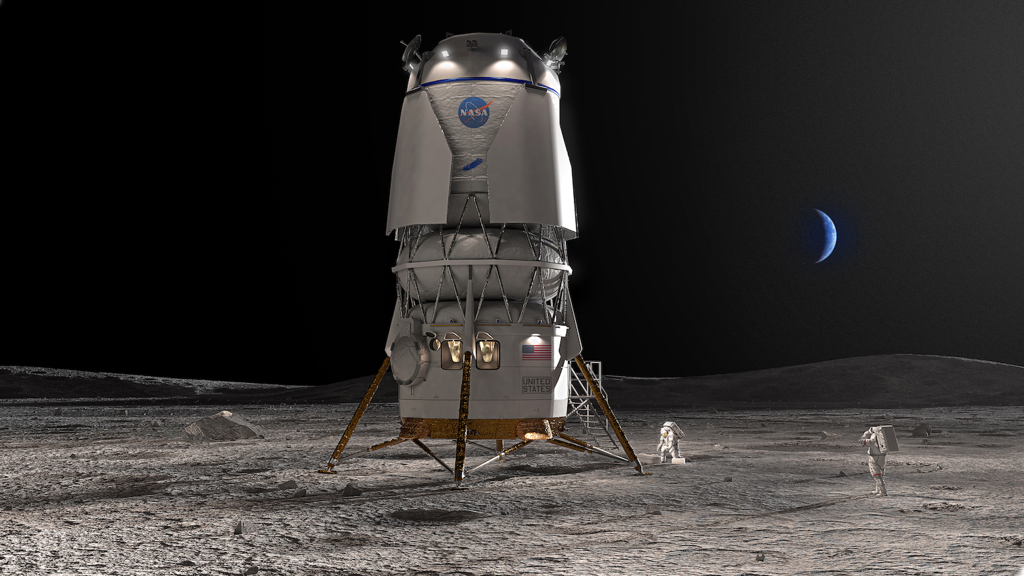

In [10]:
image.resize((1024, 576))

In [11]:
generator = torch.manual_seed(42)

In [12]:
frames = video_pipe(image, decode_chunk_size=8, generator=generator).frames[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [13]:
export_to_video(frames, 'generated.mp4', fps=7)

'generated.mp4'

In [15]:
type(frames)

PIL.Image.Image

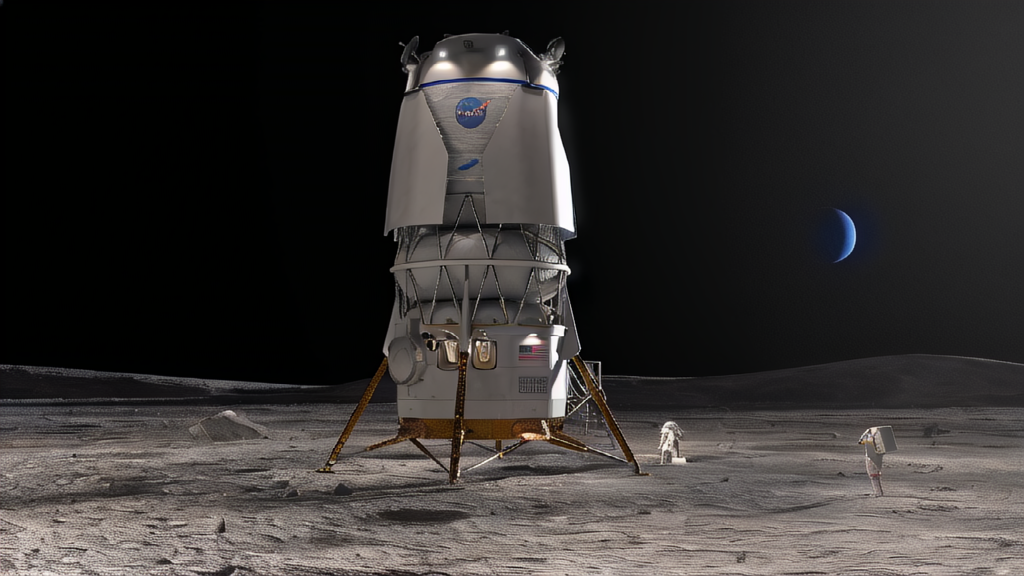

In [17]:
frames[1]